## Figures Korolev 2008

Reproduce some of the figures from the paper.


### References
- Korolev, A., 2008. Rates of phase transformations in mixed-phase clouds. Q.J.R. Meteorol. Soc. 134, 595–608. https://doi.org/10.1002/qj.230




In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import numpy as np

import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

import analytic_formulas as af

In [14]:
%matplotlib inline

In [15]:
    
print('-- -15 -------------------------')
factors = af.get_factors(af.T0-15, 800e2, verbose=True)  

print('-- -35 -------------------------')
factors = af.get_factors(af.T0-35, 800e2, verbose=True)  

print(factors.__dict__.keys())

-- -15 -------------------------
input kwargs:  {}
mv  0.0012897089110441551
weigth of adiabatic blob  1.0012897089110442
gas constant moist air  287.2654071063962
qv 0.0012897089110441551 0.0012897089110441551
cpt vs cp 1006.0884003102534 1004.1254128928664
rho_air (with Rt) 1.078784075066832 
 Ra 1.0796231760348955
-- -35 -------------------------
input kwargs:  {}
mv  0.00017396516243797628
weigth of adiabatic blob  1.000173965162438
gas constant moist air  287.07228918860704
qv 0.00017396516243797626 0.00017396516243797628
cpt vs cp 1005.1469749937315 1003.1518037403949
rho_air (with Rt) 1.1701677606005747 
 Ra 1.170290669298376
dict_keys(['Lw_param', 'Lw', 'Li_param', 'Li', 'D_param', 'D', 'k_param', 'k', 'Ew_param', 'Ew', 'Ei_param', 'Ei', 'rho_w_param', 'rho_w', 'cp_d_param', 'cp_v_param', 'cp', 'mv', 'rho_a', 'ksi', 'upsilon_w', 'upsilon_i', 'a0', 'a1', 'a2', 'a3', 'Aw', 'Ai', 'Bi_s', 'Bi', 'Bi_0', 'bi_s', 'bi_0', 'eta', 'Bw', 'bw', 'bi'])


input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}


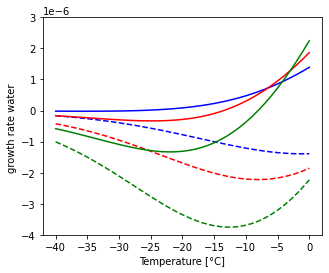

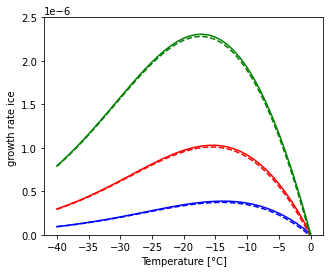

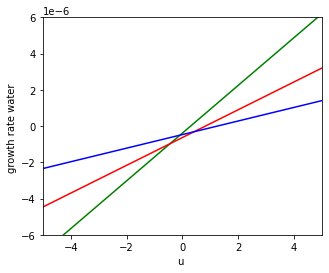

In [16]:
# K08 Fig4

def growth_rates(u, f):
    """get the growth rates of ice and water (Korolev 2008, Eq. 8, 9)"""
       
    Nwrw = 1000
    Niri = 10
    growth_water = ((f.a0*u-f.bi_s*Niri)*f.Bw*Nwrw)/(f.bw*Nwrw+f.bi*Niri)
    growth_ice = ((f.a0*u-((1-f.ksi)/f.ksi)*f.bw*Nwrw)*f.Bi*Niri)/(f.bw*Nwrw+f.bi*Niri)
    
    return growth_water, growth_ice
    
    

Ts = np.arange(-40,1,1)
params = dict(rho_w='HS', D='HP', Ei='AB', Ew='AB')
params = dict()

fig, ax = plt.subplots(figsize=(5, 4))

water_growth = growth_rates(1, af.get_factors(273.15+Ts, 900e2, **params))[0]
ax.plot(Ts, water_growth, color='b')
water_growth = growth_rates(-1, af.get_factors(273.15+Ts, 900e2, **params))[0]
ax.plot(Ts, water_growth, '--', color='b')

water_growth = growth_rates(1, af.get_factors(273.15+Ts, 500e2, **params))[0]
ax.plot(Ts, water_growth, color='r')
water_growth = growth_rates(-1, af.get_factors(273.15+Ts, 500e2, **params))[0]
ax.plot(Ts, water_growth, '--', color='r')

water_growth = growth_rates(1, af.get_factors(273.15+Ts, 300e2, **params))[0]
ax.plot(Ts, water_growth, color='g')
water_growth = growth_rates(-1, af.get_factors(273.15+Ts, 300e2, **params))[0]
ax.plot(Ts, water_growth, '--', color='g')

ax.set_ylim([-4e-6, 3e-6])
ax.set_ylabel('growth rate water ')

ax.set_xlabel('Temperature [°C]')

fig.savefig('plots/K08_fig4b.png', transparent=True)


fig, ax = plt.subplots(figsize=(5, 4))

ice_growth = growth_rates(1, af.get_factors(273.15+Ts, 900e2, **params))[1]
ax.plot(Ts, ice_growth, color='b')
ice_growth = growth_rates(-1, af.get_factors(273.15+Ts, 900e2, **params))[1]
ax.plot(Ts, ice_growth, '--', color='b')

ice_growth = growth_rates(1, af.get_factors(273.15+Ts, 500e2, **params))[1]
ax.plot(Ts, ice_growth, color='r')
ice_growth = growth_rates(-1, af.get_factors(273.15+Ts, 500e2, **params))[1]
ax.plot(Ts, ice_growth, '--', color='r')

ice_growth = growth_rates(1, af.get_factors(273.15+Ts, 300e2, **params))[1]
ax.plot(Ts, ice_growth, color='g')
ice_growth = growth_rates(-1, af.get_factors(273.15+Ts, 300e2, **params))[1]
ax.plot(Ts, ice_growth, '--', color='g')

ax.set_ylim([0, 2.5e-6])
ax.set_ylabel('growth rate ice ')

ax.set_xlabel('Temperature [°C]')

fig.savefig('plots/K08_fig4a.png', transparent=True)



u = np.arange(-5,5.1,1)
params = dict(rho_w='HS', D='HP', Ei='AB', Ew='AB')
params = dict()
params_alt = dict(Lw='FB', Li='FB',rho_w='HS', D='fixed', Ei='M', Ew='M')

fig, ax = plt.subplots(figsize=(5, 4))

water_growth = growth_rates(u, af.get_factors(273.15-5, 680e2, **params))[0]
ax.plot(u, water_growth, color='g')
water_growth = growth_rates(u, af.get_factors(273.15-15, 680e2, **params))[0]
ax.plot(u, water_growth, color='r')
water_growth = growth_rates(u, af.get_factors(273.15-25, 680e2, **params))[0]
ax.plot(u, water_growth, color='b')

# water_growth = growth_rates(u, get_factors(273.15-25, 680e2, **params_alt))[0]
# ax.plot(u, water_growth, '--', color='k')


ax.set_xlim([-5, 5])
ax.set_ylim([-6e-6, 6e-6])
ax.set_ylabel('growth rate water ')

ax.set_xlabel('u ')

fig.savefig('plots/K08_fig2.png', transparent=True)

input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {'D': 'VDI'}
input kwargs:  {'D': '?'}
input kwargs:  {'D': 'fixed'}
input kwargs:  {'D': 'HP'}


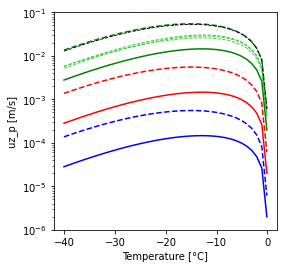

In [17]:
# K08 Fig 5a

def get_uz_p(Niri, Nwrw,  f):
    """get the threshold velocity for vapor flux in equilibrium (Korolev 2008, Eq. 15)"""
    
       
    uz_p = ((f.ksi-1)*(f.Bw*f.bi-f.bw*f.Bi)*Nwrw*Niri)/(f.a0*f.ksi*(f.Bw*Nwrw + f.Bi*Niri))
    
    return uz_p
    

Ts = np.arange(-40.1,0.15,1)
params = dict(Lw='FB', Li='FB', rho_w='HS',Ei='AB', Ew='AB')
params = dict()
params_alt = dict(D="VDI")

fig, ax = plt.subplots(figsize=(4, 4))

uz_p_T = get_uz_p(0.1, 1000, af.get_factors(273.15+Ts, 900e2, **params))
ax.plot(Ts, uz_p_T, color='blue')
uz_p_T = get_uz_p(0.1, 1000, af.get_factors(273.15+Ts, 400e2, **params))
ax.plot(Ts, uz_p_T, "--", color='blue')

uz_p_T = get_uz_p(1, 1000, af.get_factors(273.15+Ts, 900e2, **params))
ax.plot(Ts, uz_p_T, color='red')
uz_p_T = get_uz_p(1, 1000, af.get_factors(273.15+Ts, 400e2, **params))
ax.plot(Ts, uz_p_T, "--", color='red')

uz_p_T = get_uz_p(10, 1000, af.get_factors(273.15+Ts, 900e2, **params))
ax.plot(Ts, uz_p_T, color='green')
uz_p_T = get_uz_p(10, 1000, af.get_factors(273.15+Ts, 400e2, **params))
ax.plot(Ts, uz_p_T, '--', color='green')

params_alt = dict(D="VDI")
uz_p_T = get_uz_p(10, 1000, af.get_factors(273.15+Ts, 400e2, **params_alt))
ax.plot(Ts, uz_p_T, '--', color='limegreen', lw=0.9)
params_alt = dict(D="?")
uz_p_T = get_uz_p(10, 1000, af.get_factors(273.15+Ts, 400e2, **params_alt))
ax.plot(Ts, uz_p_T, '--', color='limegreen', lw=0.9)
params_alt = dict(D="fixed")
uz_p_T = get_uz_p(10, 1000, af.get_factors(273.15+Ts, 400e2, **params_alt))
ax.plot(Ts, uz_p_T, '--', color='limegreen', lw=0.9)
params_alt = dict(D="HP")
uz_p_T = get_uz_p(10, 1000, af.get_factors(273.15+Ts, 400e2, **params_alt))
ax.plot(Ts, uz_p_T, '--', color='k', lw=0.9)


ax.set_yscale('log')
ax.set_ylim([1e-6, 1e-1])
ax.set_ylabel('uz_p [m/s]')
ax.set_xlabel('Temperature [°C]')

fig.savefig('plots/K08_fig5c.png', transparent=True)

input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}


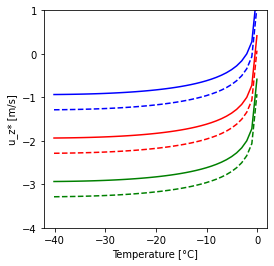

In [18]:
# K08 Fig 5b

def get_uz_0(Nwrw, f):
    """threshold vertical velocity for ice saturation u_z0 (Korolev 2008 Eq 14)"""
    
       
    uz_0 = (1-f.ksi)*f.bw*Nwrw/(f.ksi*f.a0) #critical (downdraft) velocity for ice evaporation
    
    return uz_0
    

Ts = np.arange(-40.1,0.15,1)
params = dict(rho_w='HS', D='HP', Ei='AB', Ew='AB')
params = dict()

fig, ax = plt.subplots(figsize=(4, 4))

uz_0_T = get_uz_0(100, af.get_factors(273.15+Ts, 900e2, **params))
ax.plot(Ts, -np.log10(-uz_0_T), color='blue')
uz_0_T = get_uz_0(100, af.get_factors(273.15+Ts, 400e2, **params))
ax.plot(Ts, -np.log10(-uz_0_T), "--", color='blue')

uz_0_T = get_uz_0(1000, af.get_factors(273.15+Ts, 900e2, **params))
ax.plot(Ts, -np.log10(-uz_0_T), color='red')
uz_0_T = get_uz_0(1000, af.get_factors(273.15+Ts, 400e2, **params))
ax.plot(Ts, -np.log10(-uz_0_T), "--", color='red')

uz_0_T = get_uz_0(10000, af.get_factors(273.15+Ts, 900e2, **params))
ax.plot(Ts, -np.log10(-uz_0_T), color='green')
uz_0_T = get_uz_0(10000, af.get_factors(273.15+Ts, 400e2, **params))
ax.plot(Ts, -np.log10(-uz_0_T), '--', color='green')

# ax.set_yscale('log')
ax.set_ylim([-4, 1])
ax.set_ylabel('u_z* [m/s]')
ax.set_xlabel('Temperature [°C]')

fig.savefig('plots/K08_fig5b.png', transparent=True)

input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {}
input kwargs:  {'D': 'HP'}


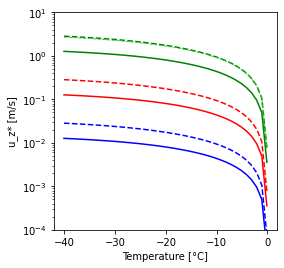

In [19]:
# K08 Fig 5a

def get_uz_star(Niri, f):
    """threshold vertical velocity for liquid saturation u_z* (Korolev 2008 Eq 13)"""
       
    uz_star = f.bi_s*Niri/f.a0 #critical (updraft) velocity for water growth
    eta = f.a2*f.Bi_0/f.a0
    uz_star2008 = ((f.Ew-f.Ei)/f.Ei)*f.eta*Niri
    
    return uz_star
    

Ts = np.arange(-40.1,0.15,1)
params = dict(rho_w='HS', D='HP', Ei='AB', Ew='AB')
params = dict()
params_alt = dict(D='HP')

fig, ax = plt.subplots(figsize=(4, 4))

uz_star_T = get_uz_star(0.1, af.get_factors(273.15+Ts, 900e2, **params))
ax.plot(Ts, uz_star_T, color='blue')
uz_star_T = get_uz_star(0.1, af.get_factors(273.15+Ts, 400e2, **params))
ax.plot(Ts, uz_star_T, "--", color='blue')

uz_star_T = get_uz_star(1, af.get_factors(273.15+Ts, 900e2, **params))
ax.plot(Ts, uz_star_T, color='red')
uz_star_T = get_uz_star(1, af.get_factors(273.15+Ts, 400e2, **params))
ax.plot(Ts, uz_star_T, "--", color='red')

uz_star_T = get_uz_star(10, af.get_factors(273.15+Ts, 900e2, **params))
ax.plot(Ts, uz_star_T, color='green')
uz_star_T = get_uz_star(10, af.get_factors(273.15+Ts, 400e2, **params))
ax.plot(Ts, uz_star_T, '--', color='green')

uz_star_T = get_uz_star(10, af.get_factors(273.15+Ts, 400e2, **params_alt))
ax.plot(Ts, uz_star_T, '--', color='limegreen', lw=0.9)



ax.set_yscale('log')
ax.set_ylim([1e-4, 1e1])
ax.set_ylabel('u_z* [m/s]')
ax.set_xlabel('Temperature [°C]')

fig.savefig('plots/K08_fig5a.png', transparent=True)

input kwargs:  {}
input kwargs:  {'D': 'HP'}


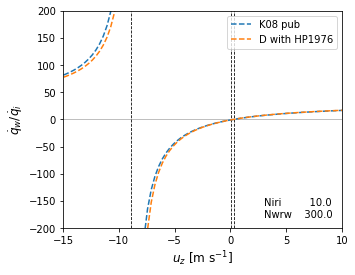

In [20]:
def ratio_change(Nwrw, Niri, u,  f):
    """ratio of growth rate of water and growth rate of ice (Korolev Mazin 2003 Eq 27)"""
    
    uz_star = f.bi_s*Niri/f.a0 #critical (updraft) velocity for water growth
    uz_p = ((f.ksi-1)*(f.Bw*f.bi-f.bw*f.Bi)*Nwrw*Niri)/(f.a0*f.ksi*(f.Bw*Nwrw + f.Bi*Niri))
    uz_0 = (1-f.ksi)*f.bw*Nwrw/(f.ksi*f.a0) #critical (downdraft) velocity for ice evaporation
    ratio_change_qw_qi = ((f.a0*u-f.bi_s*Niri)*f.Bw*Nwrw)/((f.a0*u-(1-f.ksi)/f.ksi*f.bw*Nwrw)*f.Bi*Niri)
    
    return {'uz_0': uz_0, 'uz_p': uz_p, 'uz_star': uz_star, 
            'ratio_change_qw_qi': ratio_change_qw_qi}
    

u = np.arange(-17, 17, 0.33)
Niri = 10
Nwrw = 300

params_alt = dict(D='HP')
params = dict()
uk = ratio_change(Nwrw, Niri, u, af.get_factors(273.15-5, 680e2, **params))

fig, ax = plt.subplots(figsize=(5, 4))

ijump = np.where(np.diff(uk['ratio_change_qw_qi'])<0)[0][0]
uk['ratio_change_qw_qi'][ijump] = np.nan

ax.axhline(0, color='grey', lw=0.5)

ax.axvline(uk['uz_0'], color='black', lw=0.8, ls='--')
ax.axvline(uk['uz_p'], color='black', lw=0.8, ls='--')
ax.axvline(uk['uz_star'], color='black', lw=0.8, ls='--')

ax.plot(u, uk['ratio_change_qw_qi'], '--', label='K08 pub')


uk = ratio_change(Nwrw, Niri, u, af.get_factors(273.15-5, 680e2, **params_alt))
ijump = np.where(np.diff(uk['ratio_change_qw_qi'])<0)[0][0]
uk['ratio_change_qw_qi'][ijump] = np.nan
ax.plot(u, uk['ratio_change_qw_qi'], '--', label='D with HP1976')


ax.legend()
s = f"Niri     {Niri:8.1f}\nNwrw {Nwrw:8.1f}"
ax.text(3, -180, s)

ax.set_ylim([-200, 200])
ax.set_xlim([-15, 10])

ax.set_ylabel('$\dot q_w$/$\dot q_i$', fontsize=12)
ax.set_xlabel('$u_z$ [m s$^{-1}$]', fontsize=12)

fig.savefig('plots/K08_fig7.png', transparent=True)